In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency


In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.drop('customerID',axis=1,inplace=True)

# Churn

In [8]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

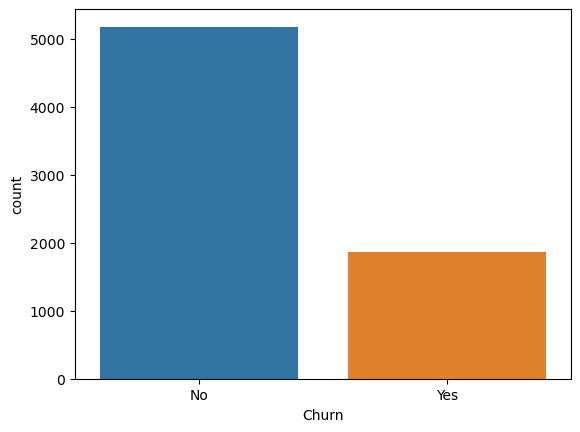

In [9]:
sns.countplot(df.Churn)

# gender

In [10]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

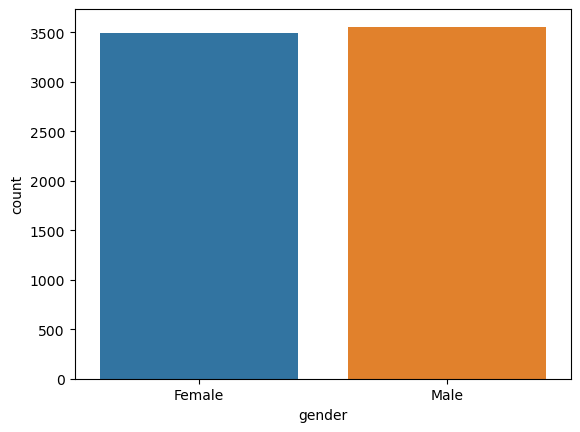

In [11]:
sns.countplot(df.gender)

In [12]:
chir=chi2_contingency(pd.crosstab(df['gender'],df['Churn']))

In [13]:
chir[0]

0.4840828822091383

In [14]:
print('p-value',chir[1])

p-value 0.48657873605618596


In [15]:
df.drop('gender',axis=1,inplace=True)



# SeniorCitizen

In [16]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

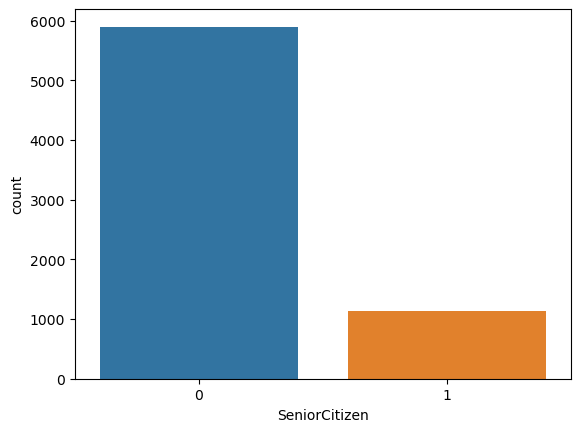

In [17]:
sns.countplot(df.SeniorCitizen)

In [18]:
chir=chi2_contingency(pd.crosstab(df['SeniorCitizen'],df['Churn']))

In [19]:
chir[1]

1.510066805092378e-36

# Partner

In [20]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Partner', ylabel='count'>

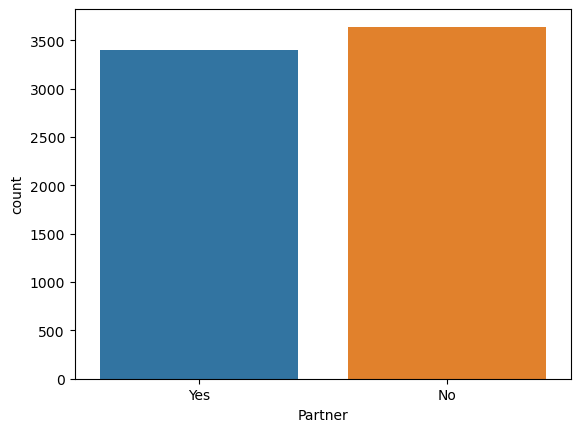

In [21]:
sns.countplot(df.Partner)

In [22]:
chi2_contingency(pd.crosstab(df['Partner'],df['Churn']))[1]

2.1399113440759935e-36

# Dependents

In [23]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

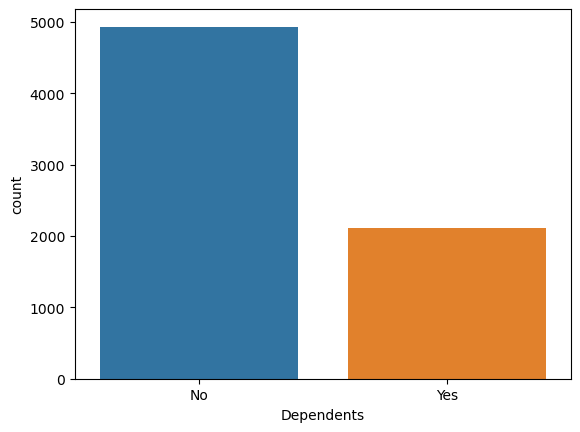

In [24]:
sns.countplot(df.Dependents)

In [25]:
chi2_contingency(pd.crosstab(df['Dependents'],df['Churn']))[1]

4.9249216612154196e-43

# tenure

In [26]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

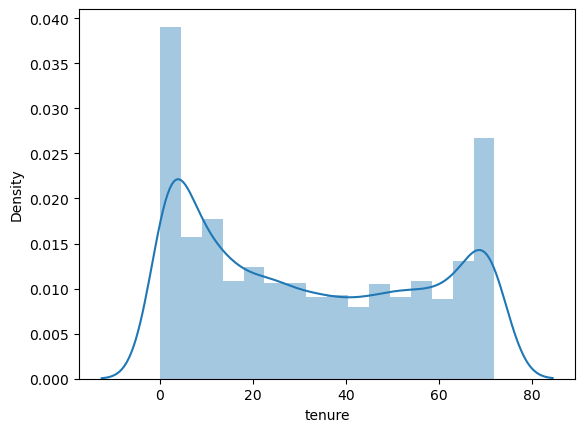

In [27]:
sns.distplot(df.tenure)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

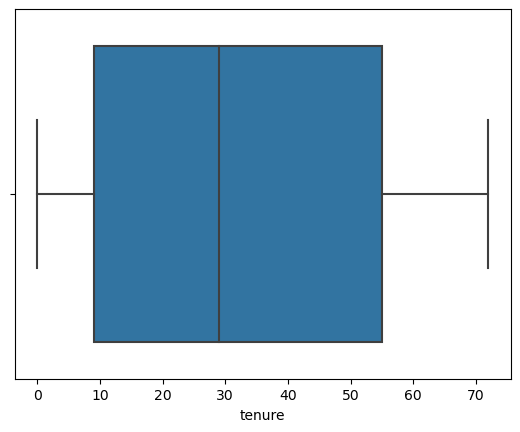

In [28]:
sns.boxplot(df.tenure)

# PhoneService

In [29]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

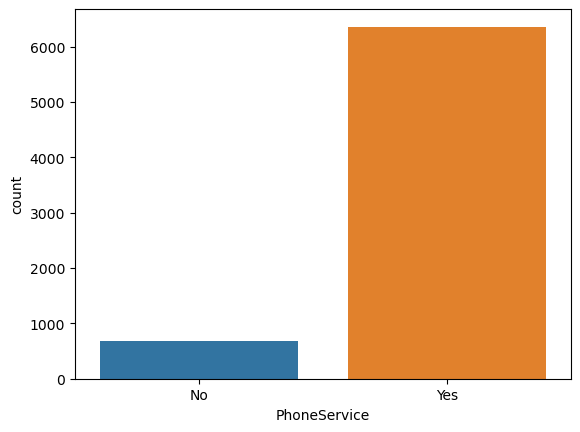

In [30]:
sns.countplot(df.PhoneService)

In [31]:
chi2_contingency(pd.crosstab(df['PhoneService'],df['Churn']))[1]

0.3387825358066928

In [32]:
df.drop('PhoneService',inplace=True,axis=1)

# MultipleLines

In [33]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

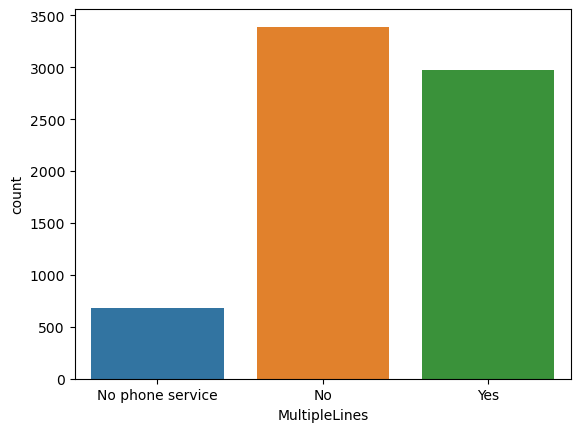

In [34]:
sns.countplot(df.MultipleLines)

In [35]:
chi2_contingency(pd.crosstab(df['MultipleLines'],df['Churn']))[1]

0.0034643829548773

# InternetService

In [36]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

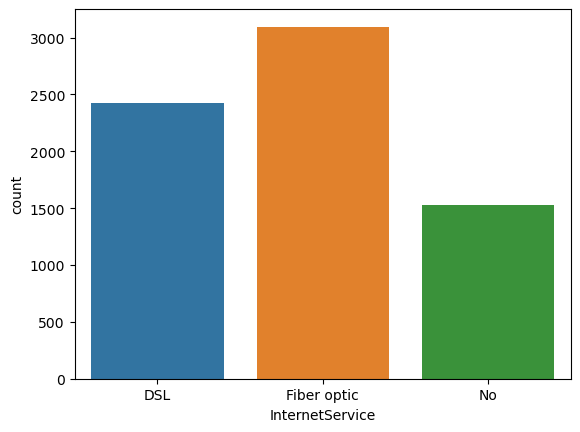

In [37]:
sns.countplot(df.InternetService)

In [38]:
chi2_contingency(pd.crosstab(df['InternetService'],df['Churn']))[1]

9.571788222840544e-160

# OnlineSecurity

In [39]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

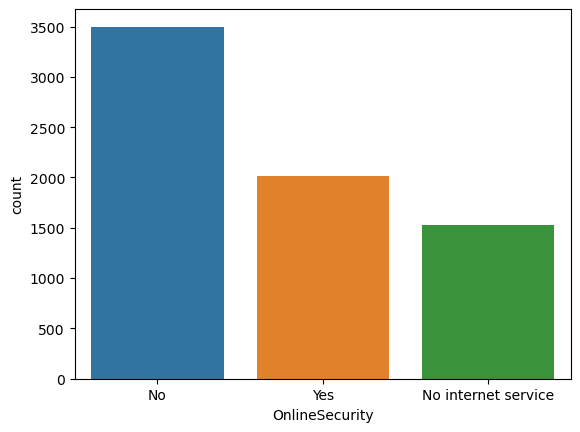

In [40]:
sns.countplot(df.OnlineSecurity)

In [41]:
chi2_contingency(pd.crosstab(df['OnlineSecurity'],df['Churn']))[1]

2.661149635176552e-185

# OnlineBackup

In [42]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

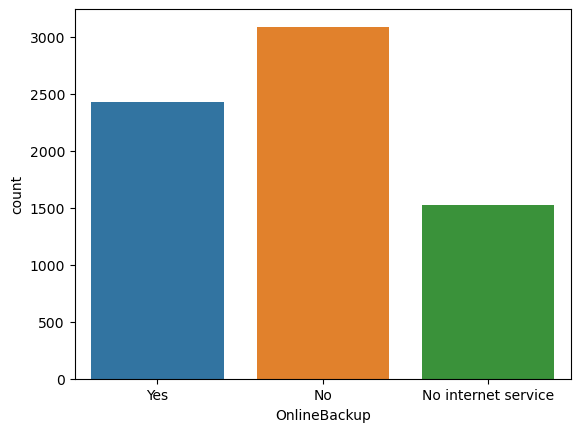

In [43]:
sns.countplot(df.OnlineBackup)

In [44]:
chi2_contingency(pd.crosstab(df['OnlineBackup'],df['Churn']))[1]

2.0797592160864276e-131

# OnlineBackup

In [45]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

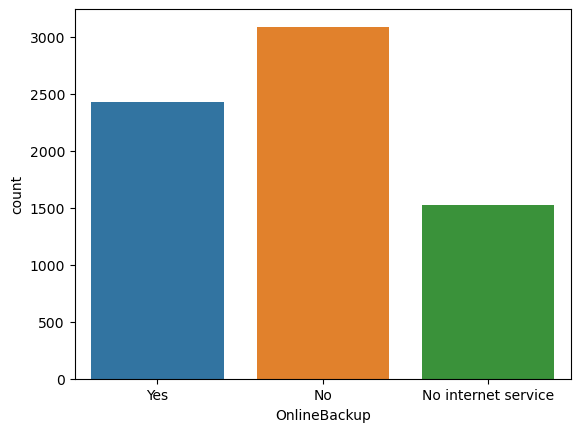

In [46]:
sns.countplot(df.OnlineBackup)

In [47]:
chi2_contingency(pd.crosstab(df['OnlineBackup'],df['Churn']))[1]

2.0797592160864276e-131

# DeviceProtection

In [48]:
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

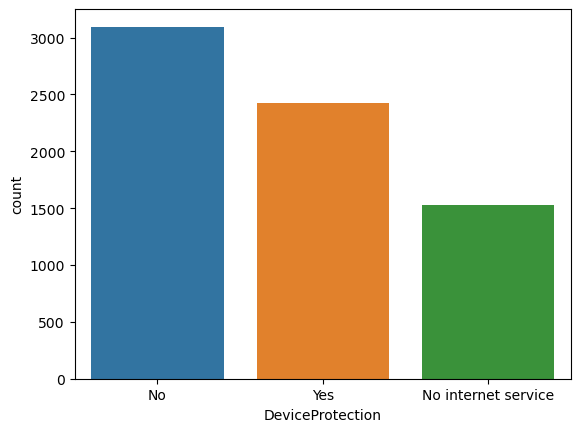

In [49]:
sns.countplot(df.DeviceProtection)

In [50]:
chi2_contingency(pd.crosstab(df['DeviceProtection'],df['Churn']))[1]

5.505219496457244e-122

# TechSupport

In [51]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

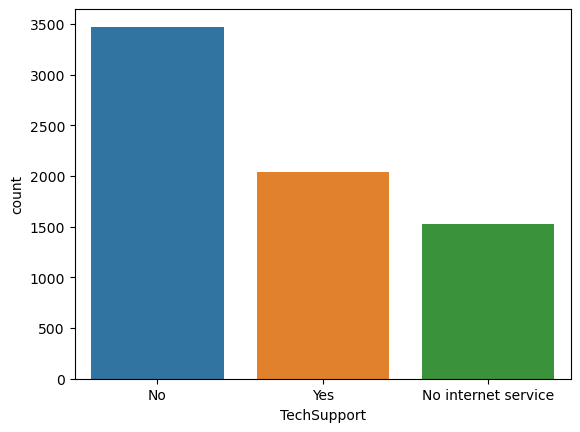

In [52]:
sns.countplot(df.TechSupport)

In [53]:
chi2_contingency(pd.crosstab(df['TechSupport'],df['Churn']))[1]

1.4430840279998987e-180

# StreamingTV

In [54]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

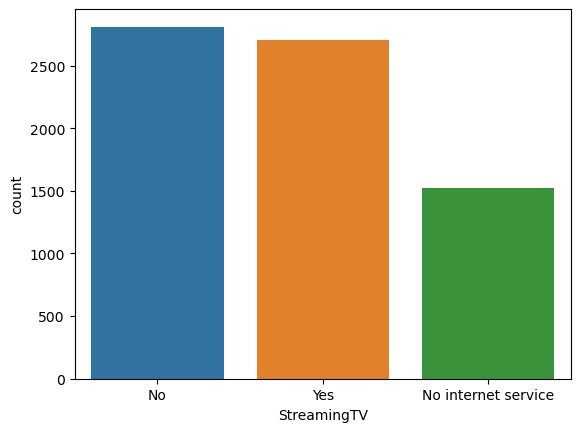

In [55]:
sns.countplot(df.StreamingTV)

In [56]:
chi2_contingency(pd.crosstab(df['StreamingTV'],df['Churn']))[1]

5.528994485739183e-82

# StreamingMovies

In [57]:
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

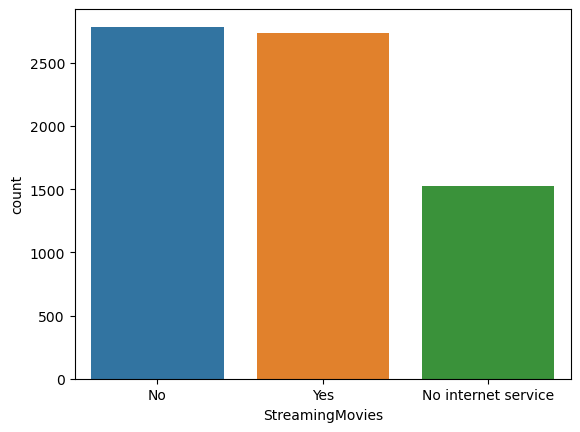

In [58]:
sns.countplot(df.StreamingMovies)

In [59]:
chi2_contingency(pd.crosstab(df['StreamingMovies'],df['Churn']))[1]

2.667756755723681e-82

# Contract

In [60]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

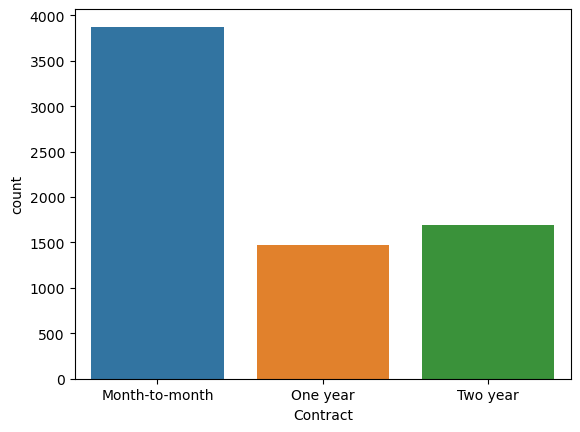

In [61]:
sns.countplot(df.Contract)

In [62]:
chi2_contingency(pd.crosstab(df['Contract'],df['Churn']))[1]

5.863038300673391e-258

# PaperlessBilling

In [63]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

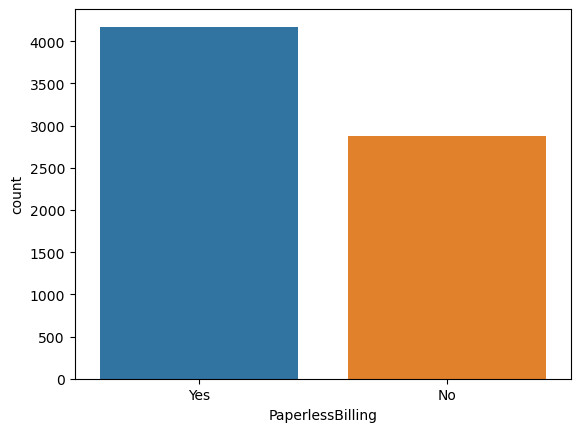

In [64]:
sns.countplot(df.PaperlessBilling)

In [65]:
chi2_contingency(pd.crosstab(df['PaperlessBilling'],df['Churn']))[1]

4.073354668665985e-58

# PaymentMethod

In [66]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

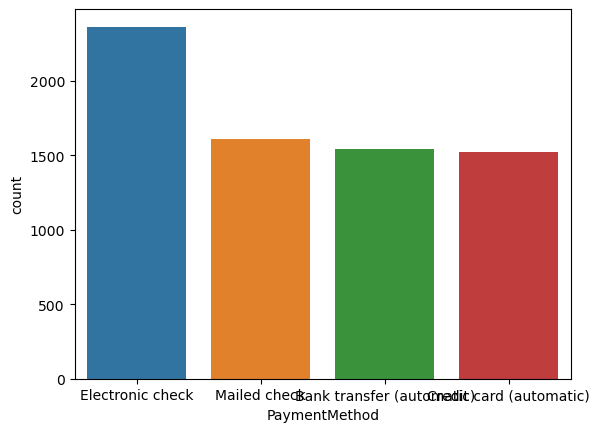

In [67]:
sns.countplot(df.PaymentMethod)

In [68]:
chi2_contingency(pd.crosstab(df['PaymentMethod'],df['Churn']))[1]

3.6823546520097993e-140

# MonthlyCharges

In [69]:
df.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

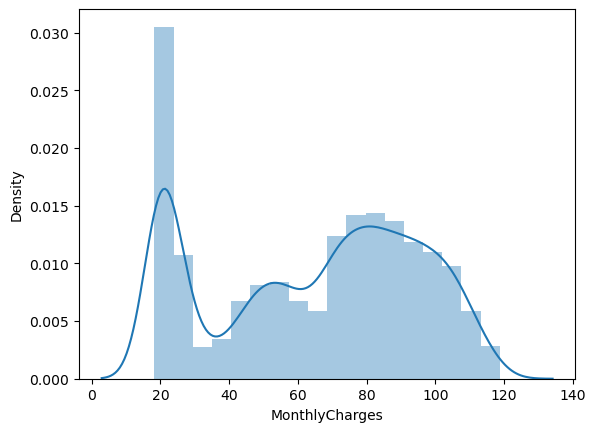

In [70]:
sns.distplot(df.MonthlyCharges)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

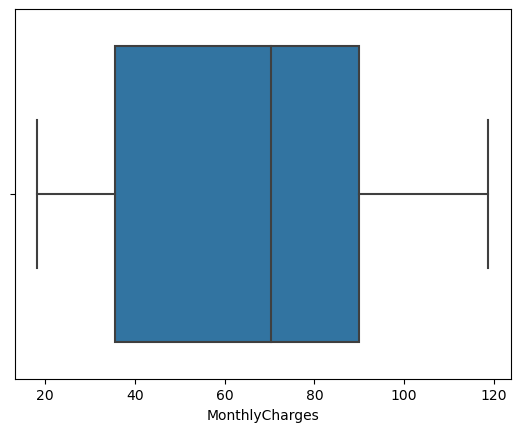

In [71]:
sns.boxplot(df.MonthlyCharges)

# TotalCharges

In [72]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [73]:
df.TotalCharges.isnull().sum()

0

In [74]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [75]:
df.TotalCharges.isnull().sum()

11

In [76]:
df.dropna(axis=0,inplace=True)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

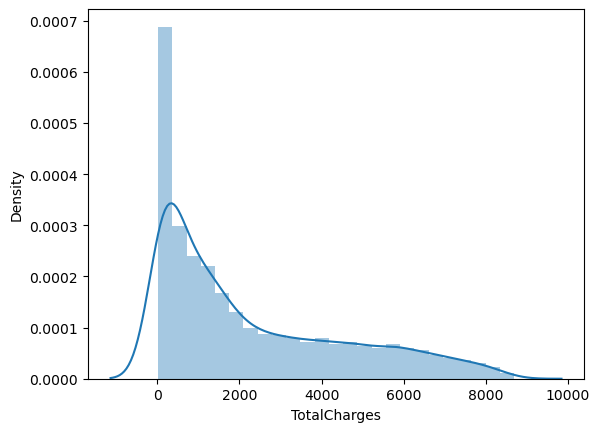

In [77]:
sns.distplot(df.TotalCharges)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

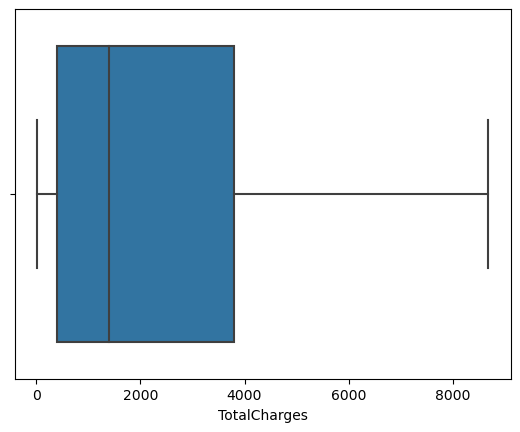

In [78]:
sns.boxplot(df.TotalCharges)

<AxesSubplot:>

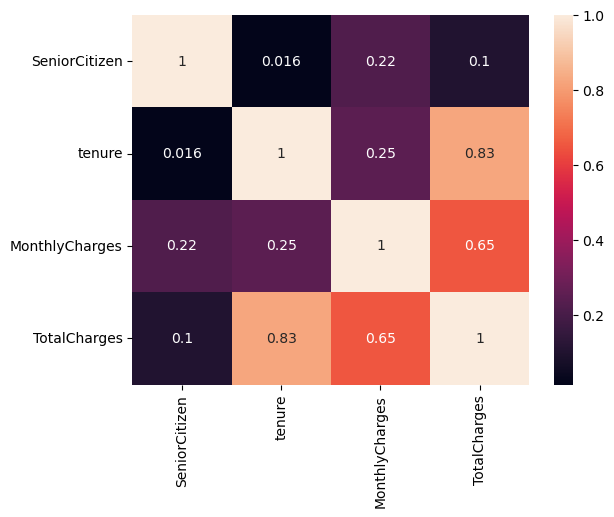

In [79]:
sns.heatmap(df.corr(),annot=True)

In [80]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [82]:
lr=LabelEncoder()
df.Churn=lr.fit_transform(df.Churn)
df.PaperlessBilling=lr.fit_transform(df.PaperlessBilling)
df.StreamingMovies=lr.fit_transform(df.StreamingMovies)
df.StreamingTV=lr.fit_transform(df.StreamingTV)
df.TechSupport=lr.fit_transform(df.TechSupport)
df.DeviceProtection=lr.fit_transform(df.DeviceProtection)
df.OnlineBackup=lr.fit_transform(df.OnlineBackup)
df.OnlineSecurity=lr.fit_transform(df.OnlineSecurity)

df.Dependents=lr.fit_transform(df.Dependents)
df.Partner=lr.fit_transform(df.Partner)

df.SeniorCitizen=lr.fit_transform(df.SeniorCitizen)
df.MultipleLines=lr.fit_transform(df.MultipleLines)



In [83]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,DSL,0,2,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,0,DSL,2,0,2,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,0,DSL,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,1,DSL,2,0,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [84]:
d=pd.get_dummies(df.InternetService,drop_first=True)
r=pd.get_dummies(df.Contract,drop_first=True)
e=pd.get_dummies(df.PaymentMethod,drop_first=True)

In [85]:
df=pd.concat([df,d,r,e],axis=1)

In [86]:
df.drop(['Contract','PaymentMethod','InternetService'],axis=1,inplace=True)

In [87]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,0,1,0,1,1,0,2,0,0,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,34,0,2,0,2,0,0,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,2,0,2,2,0,0,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,45,1,2,0,2,2,0,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,2,0,0,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [88]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [89]:
#smote
zero=df[df.Churn==0]
one=df[df.Churn==1]

In [90]:
mali_over=resample(one,replace=True,n_samples=len(zero),random_state=27)


In [91]:
dfsmote=pd.concat([zero,mali_over])
dfsmote.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [92]:
x = dfsmote.loc[:, df.columns != 'Churn']
y = dfsmote.loc[:, df.columns == 'Churn']

# Model Building

In [93]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [94]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

## Random Forest

In [95]:
params={
    'n_estimators':[300,400,500],
    'max_features':['sqrt',0.25],
    'min_samples_split':[2,4,6]
}

In [96]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

C:\Users\abhay\AppData\Local\Temp\ipykernel_5216\2148472383.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestClassifier()

In [97]:
gd=GridSearchCV(rf,params)

In [98]:
#gd.fit(xtrain,ytrain)

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was pa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 0.25],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [300, 400, 500]})

In [99]:
gd.best_estimator_

RandomForestClassifier(max_features=0.25, n_estimators=400)

In [129]:
rf=RandomForestClassifier(random_state=20,max_features=0.25, n_estimators=400)

In [130]:
rf.fit(xtrain,ytrain)

C:\Users\abhay\AppData\Local\Temp\ipykernel_5216\2224009558.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestClassifier(max_features=0.25, n_estimators=400, random_state=20)

In [131]:
#rf=RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt')

In [132]:
y_pred=rf.predict(xtest)

In [133]:
confusion_matrix(ytest,y_pred)

array([[1291,  280],
       [ 100, 1427]], dtype=int64)

In [134]:
accuracy_score(ytest,y_pred)

0.8773402194964494

In [135]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1571
           1       0.84      0.93      0.88      1527

    accuracy                           0.88      3098
   macro avg       0.88      0.88      0.88      3098
weighted avg       0.88      0.88      0.88      3098



In [136]:
prob=rf.predict_proba(xtest)
prob

array([[0.76  , 0.24  ],
       [0.0125, 0.9875],
       [0.0155, 0.9845],
       ...,
       [0.0025, 0.9975],
       [1.    , 0.    ],
       [0.0225, 0.9775]])

In [137]:
#roc
fp,tp,th=roc_curve(ytest,prob[:,1])
roc_auc = auc(fp, tp) 
print(roc_auc)

0.9581521578278864


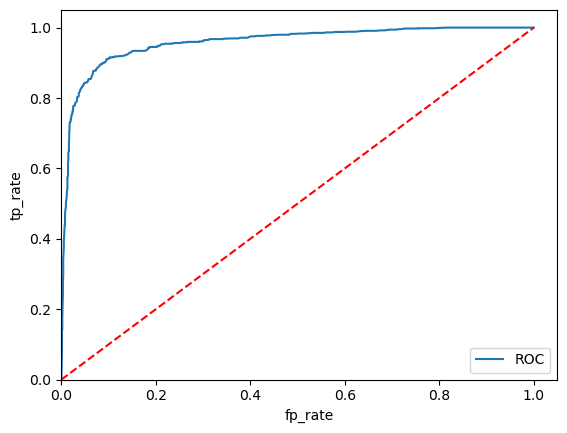

In [138]:
plt.figure()
plt.plot(fp,tp,label='ROC')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('fp_rate')
plt.ylabel('tp_rate')
plt.legend(loc='lower right')
plt.show()

## Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression


In [140]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
y_pred=lg.predict(xtest)

In [142]:
confusion_matrix(ytest,y_pred)

array([[1175,  396],
       [ 329, 1198]], dtype=int64)

In [143]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1571
           1       0.75      0.78      0.77      1527

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098



In [144]:
lg.score(xtest,ytest)

0.7659780503550678

## Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier


In [150]:
dt=DecisionTreeClassifier()


DecisionTreeClassifier()

In [156]:
parm={'max_depth':[200,500,600],'min_samples_leaf':[1,2,3,4,5]}

In [157]:
gd=GridSearchCV(dt,parm)

In [158]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [200, 500, 600],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [159]:
gd.best_estimator_

DecisionTreeClassifier(max_depth=500)

In [162]:
dt=DecisionTreeClassifier(max_depth=500,random_state=20)


In [163]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=500, random_state=20)

In [164]:
y_pred=dt.predict(xtest)

In [165]:
confusion_matrix(ytest,y_pred)

array([[1229,  342],
       [ 114, 1413]], dtype=int64)

In [166]:
dt.score(xtest,ytest)

0.8528082633957392

## Svm

In [167]:
# import SVC from sklearn
from sklearn.svm import SVC

# build the model
svclassifier = SVC(kernel='sigmoid')

# fit the model
svclassifier.fit(xtrain, ytrain)

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [168]:
# predict the values
y_pred = svclassifier.predict(xtest)

In [169]:
confusion_matrix(ytest, y_pred)

array([[831, 740],
       [720, 807]], dtype=int64)

In [170]:
accuracy_score(ytest,y_pred)

0.5287282117495158

# Random Forest gives the best accuracy 87%